This is a Exercise Performed to Predict Case-Shiller U.S. National Home Price Index from https://fred.stlouisfed.org/series/CSUSHPISA using the last 20 Years HPI (Home Price Index) using Time Series Forecasting ARIMA Model. This is an Example Model to showcase the Prediction Logic from the past data. We will be predicting the CSUSHPISA for next 7 days at any point of Time.

There are various factors affecting the Home Price Index some of which are mentioned as below

- The Case-Shiller is based on the repeat-sales pricing technique developed by the economists for whom the index is named.
- The national Case-Shiller index is supplemented by composite indexes tracking prices in 10 and 20 key U.S. metro areas, as well as indexes tracking sales based on the home's price relative to the market average.
- The index is based on successive arms-length sales of the same house recorded in local property records.
- Housing prices as reflected by the Case-Shiller and similar indexes are an important factor in economic performance.

The National Home Price Index tracks changes in the value of U.S. single-family homes on a monthly basis. The national index is a composite of home price indexes from each of nine U.S. regions based on census divisions.

The 10-city composite index covers 10 metro areas including Boston, Chicago, Denver, Las Vegas, Los Angeles, Miami, New York, San Diego, San Francisco, and Washington, D.C.

The 20-city composite index, includes all of the metro areas above along with Atlanta, Charlotte, Cleveland, Dallas, Detroit, Minneapolis, Phoenix, Portland (Oregon), Seattle, and Tampa.

##What Case-Shiller Does and Doesn't Track

Each index measures changes in the prices of single-family, detached homes using the repeat-sales method, which compares the sale price of a given property in successive transactions. That means new homes must be bought and then resold before their prices can be included in the Case-Shiller sample.

Case-Shiller indexes track so-called arms-length sale transactions: those where the sale price reflects market value because the buyer and seller were each acting solely in their own best interest. Property sales to family members and repossessions by banks at the start of the foreclosure process are excluded. So are sales after which the property designation changes (for example from a single-family home to condominium), or those with a price suggestive of a data error.

##The Case-Shiller Methodology

The sale price of the same single-family home in successive arms-length transactions, known as a "sale pair," is the basic data unit of the Case-Shiller indexes. For each home in the most recent monthly sample of recorded transactions, CoreLogic attempts to identify a prior arms-length transaction to assemble such pairs.

Sales pairs are assigned to one of three price tiers—low, medium, or high—based on the first sale price in a sale pair. These data sets are used to produce Low-Tier, Medium-Tier, and High-Tier indexes using the same methodology as for the city composite indexes.

The index weighting methodology lowers the weight of the 10% to 15% of sales pairs with the largest price changes, and of those with more time between the two transactions as more likely to reflect non-market factors.

Each month's index data reflects transactions for three months, so that the Case-Shiller indexes for June, published at the end of August, reflect transaction prices in April, May, and June, for example.

Source: https://www.investopedia.com/articles/mortgages-real-estate/10/understanding-case-shiller-index.asp#:~:text=The%20national%20Case%2DShiller%20index,recorded%20in%20local%20property%20records.

##Importing Basic Libraries and Data from Website

https://fred.stlouisfed.org/series/CSUSHPISA

In [127]:
import numpy as np
import pandas as pd
url = "https://fred.stlouisfed.org/graph/fredgraph.csv?bgcolor=%23e1e9f0&chart_type=line&drp=0&fo=open%20sans&graph_bgcolor=%23ffffff&height=450&mode=fred&recession_bars=on&txtcolor=%23444444&ts=12&tts=12&width=1138&nt=0&thu=0&trc=0&show_legend=yes&show_axis_titles=yes&show_tooltip=yes&id=CSUSHPISA&scale=left&cosd=1987-01-01&coed=2023-07-01&line_color=%234572a7&link_values=false&line_style=solid&mark_type=none&mw=3&lw=2&ost=-99999&oet=99999&mma=0&fml=a&fq=Monthly&fam=avg&fgst=lin&fgsnd=2020-02-01&line_index=1&transformation=lin&vintage_date=2023-09-26&revision_date=2023-09-26&nd=1987-01-01"
df= pd.read_csv(url)

##Importing Basic Visualisation Libraries

In [128]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import plotly as py
import plotly.graph_objs as go
from plotly.graph_objs import Scatter, Layout
import gc
import os
py.offline.init_notebook_mode(connected = True)
import datetime as dt
plt.rcParams['figure.dpi'] = 140

##CHECKING VERSIONS OF LIBRARIES

In [129]:
print('Numpy Version',np.__version__)
print('Pandas Version',pd.__version__)
print('Seaborn Version',sns.__version__)
print('Matplotlib Version',matplotlib.__version__)

Numpy Version 1.23.5
Pandas Version 1.5.3
Seaborn Version 0.12.2
Matplotlib Version 3.7.1


##Exploratory Data Analysis

##READING THE DATA AND CHECKING THE FIRST 5 ROWS AND COLUMNS

In [130]:
df.head()

,DATE,CSUSHPISA
0,1987-01-01,63.964
1,1987-02-01,64.424
2,1987-03-01,64.736
3,1987-04-01,65.132
4,1987-05-01,65.563


CHECKING SHAPE OF THE DATA

In [131]:
df.shape

(439, 2)

CHECKING BASIC INFO OF THE DATASET

In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 439 entries, 0 to 438
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   DATE       439 non-null    object 
 1   CSUSHPISA  439 non-null    float64
dtypes: float64(1), object(1)
memory usage: 7.0+ KB


CHECKING FOR MISSING VALUES

In [133]:
#MISSING VALUES

for i in df.columns:
    null_rate = df[i].isnull().sum() / len(df) * 100
    if null_rate == 0 :
        print("{} null rate: {}%".format(i,round(null_rate,2)))

DATE null rate: 0.0%
CSUSHPISA null rate: 0.0%


In [134]:
#Number of Missing Values
df_na= df.isna().sum()
df_na[df_na.values > 0].sort_values(ascending=False)

Series([], dtype: int64)

No Missing Values

DESCRIBE THE DATA

In [135]:
df.describe().T.apply(lambda s: s.apply('{0:.5f}'.format))

,count,mean,std,min,25%,50%,75%,max
CSUSHPISA,439.00000,141.14356,60.26296,63.96400,82.07250,140.35000,178.14050,306.72000


In [136]:
#Let's look at the distribution of price at different percentiles
print("0.5% properties have a price lower than {0: .2f}".format(np.percentile(df["CSUSHPISA"], 0.5)))
print("  1% properties have a price lower than {0: .2f}".format(np.percentile(df["CSUSHPISA"], 1)))
print("  5% properties have a price lower than {0: .2f}".format(np.percentile(df["CSUSHPISA"], 5)))
print(" 10% properties have a price lower than {0: .2f}".format(np.percentile(df["CSUSHPISA"], 10)))
print(" 90% properties have a price lower than {0: .2f}".format(np.percentile(df["CSUSHPISA"], 90)))
print(" 95% properties have a price lower than {0: .2f}".format(np.percentile(df["CSUSHPISA"], 95)))
print(" 99% properties have a price lower than {0: .2f}".format(np.percentile(df["CSUSHPISA"], 99)))
print("99.5% properties have a price lower than {0: .2f}".format(np.percentile(df["CSUSHPISA"], 99.5)))

0.5% properties have a price lower than  64.81
  1% properties have a price lower than  65.76
  5% properties have a price lower than  73.03
 10% properties have a price lower than  76.10
 90% properties have a price lower than  213.04
 95% properties have a price lower than  270.79
 99% properties have a price lower than  303.38
99.5% properties have a price lower than  304.57


In [137]:
## We are interested in building a model to correctly predict the listing price which are greater than 0 and less than 99%
listings = df[(df.CSUSHPISA > 64 ) & (df.CSUSHPISA < 303.38 )]

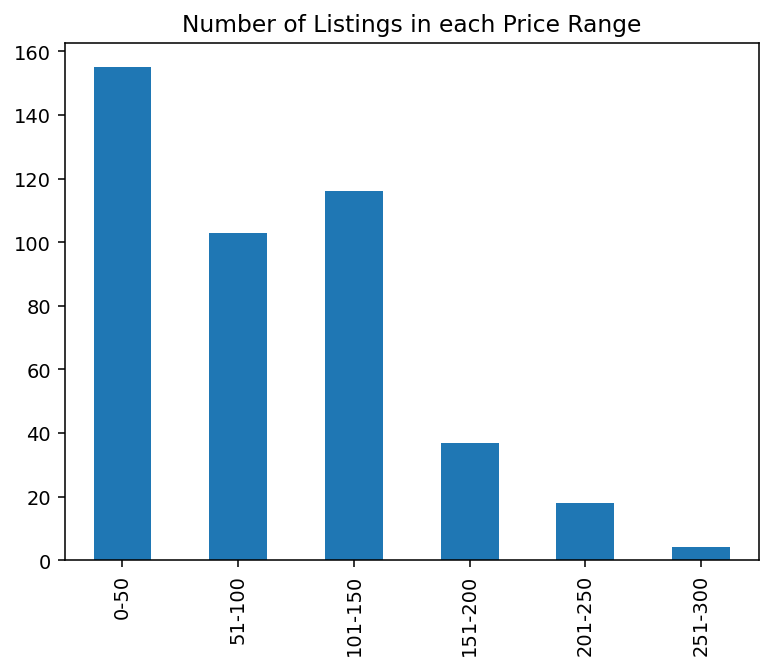

In [138]:
## Let's create a range variable to understand how many records we have in different slabs

price_range = pd.cut(df["CSUSHPISA"],
                     bins=[50, 100, 150, 200, 250, 300, df["CSUSHPISA"].max()],
                     labels=["0-50", "51-100", "101-150", "151-200", "201-250", "251-300"])
listings["price_range"] = price_range
listings["price_range"].value_counts().sort_index().plot(kind="bar")
plt.title("Number of Listings in each Price Range")
plt.show()

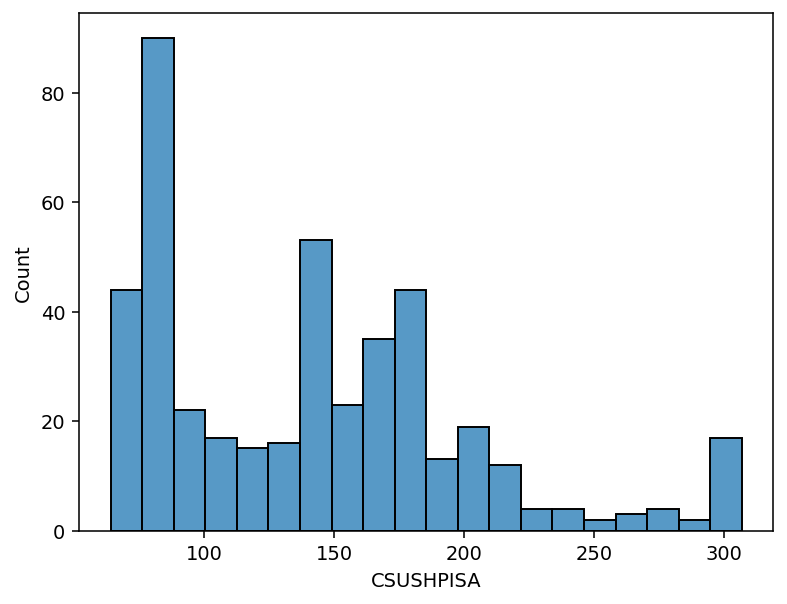

In [139]:
sns.histplot(df['CSUSHPISA'],bins=20);

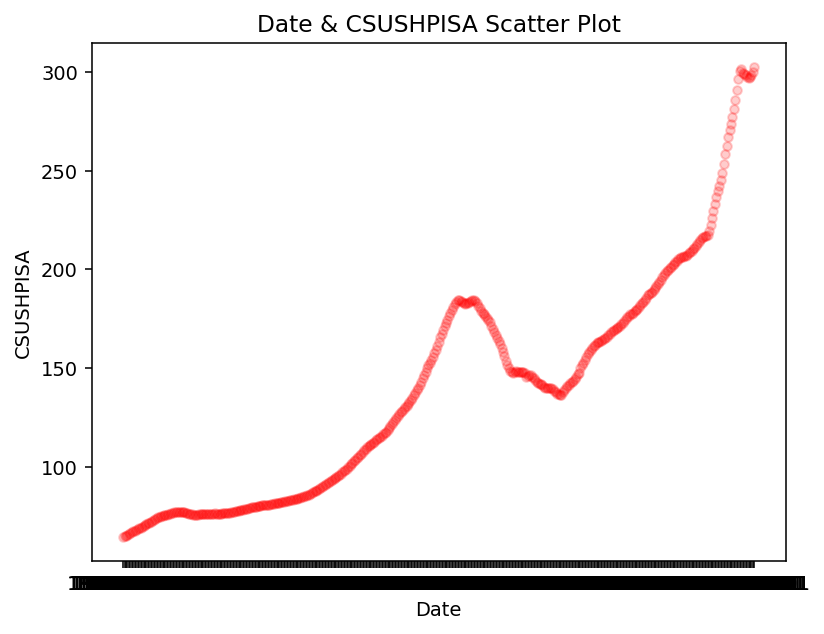

In [140]:
## Study bedrooms vs bath

listings.plot(kind='scatter', x='DATE', y='CSUSHPISA',alpha = 0.2,color = 'red')
plt.xlabel('Date')              # label = name of label
plt.ylabel('CSUSHPISA')
plt.title('Date & CSUSHPISA Scatter Plot')            # title = title of plot
plt.show()

In [141]:
from plotly.offline import iplot

In [142]:
trace1 = go.Scatter(
    x = df.DATE,
    y = df['CSUSHPISA'].astype(float),
    mode = 'lines',
    name = 'Open'
)

layout = dict(
    title='CSUSHPISA with the Slider ',
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                #change the count to desired amount of months.
                dict(count=1,
                     label='1m',
                     step='month',
                     stepmode='backward'),
                dict(count=6,
                     label='6m',
                     step='month',
                     stepmode='backward'),
                dict(count=12,
                     label='1y',
                     step='month',
                     stepmode='backward'),
                dict(count=36,
                     label='3y',
                     step='month',
                     stepmode='backward'),
                dict(count=60,
                     label='5y',
                     step='month',
                     stepmode='backward'),
                dict(count=120,
                     label='10y',
                     step='month',
                     stepmode='backward'),
                dict(step='all')
            ])
        ),
        rangeslider=dict(
            visible = True
        ),
        type='date'
    )
)

data = [trace1]
fig = go.Figure(data=data, layout=layout)
iplot(fig, filename = "Time Series with Rangeslider")
fig.show(renderer="colab")

Decomposition

In [143]:
from scipy import stats
import statsmodels.api as sm
import warnings
from itertools import product

In [144]:
df= df.set_index(['DATE'])

In [146]:
df

,CSUSHPISA
DATE,
1987-01-01,63.964
1987-02-01,64.424
1987-03-01,64.736
1987-04-01,65.132
1987-05-01,65.563
...,...
2023-03-01,298.396
2023-04-01,300.208
2023-05-01,302.685


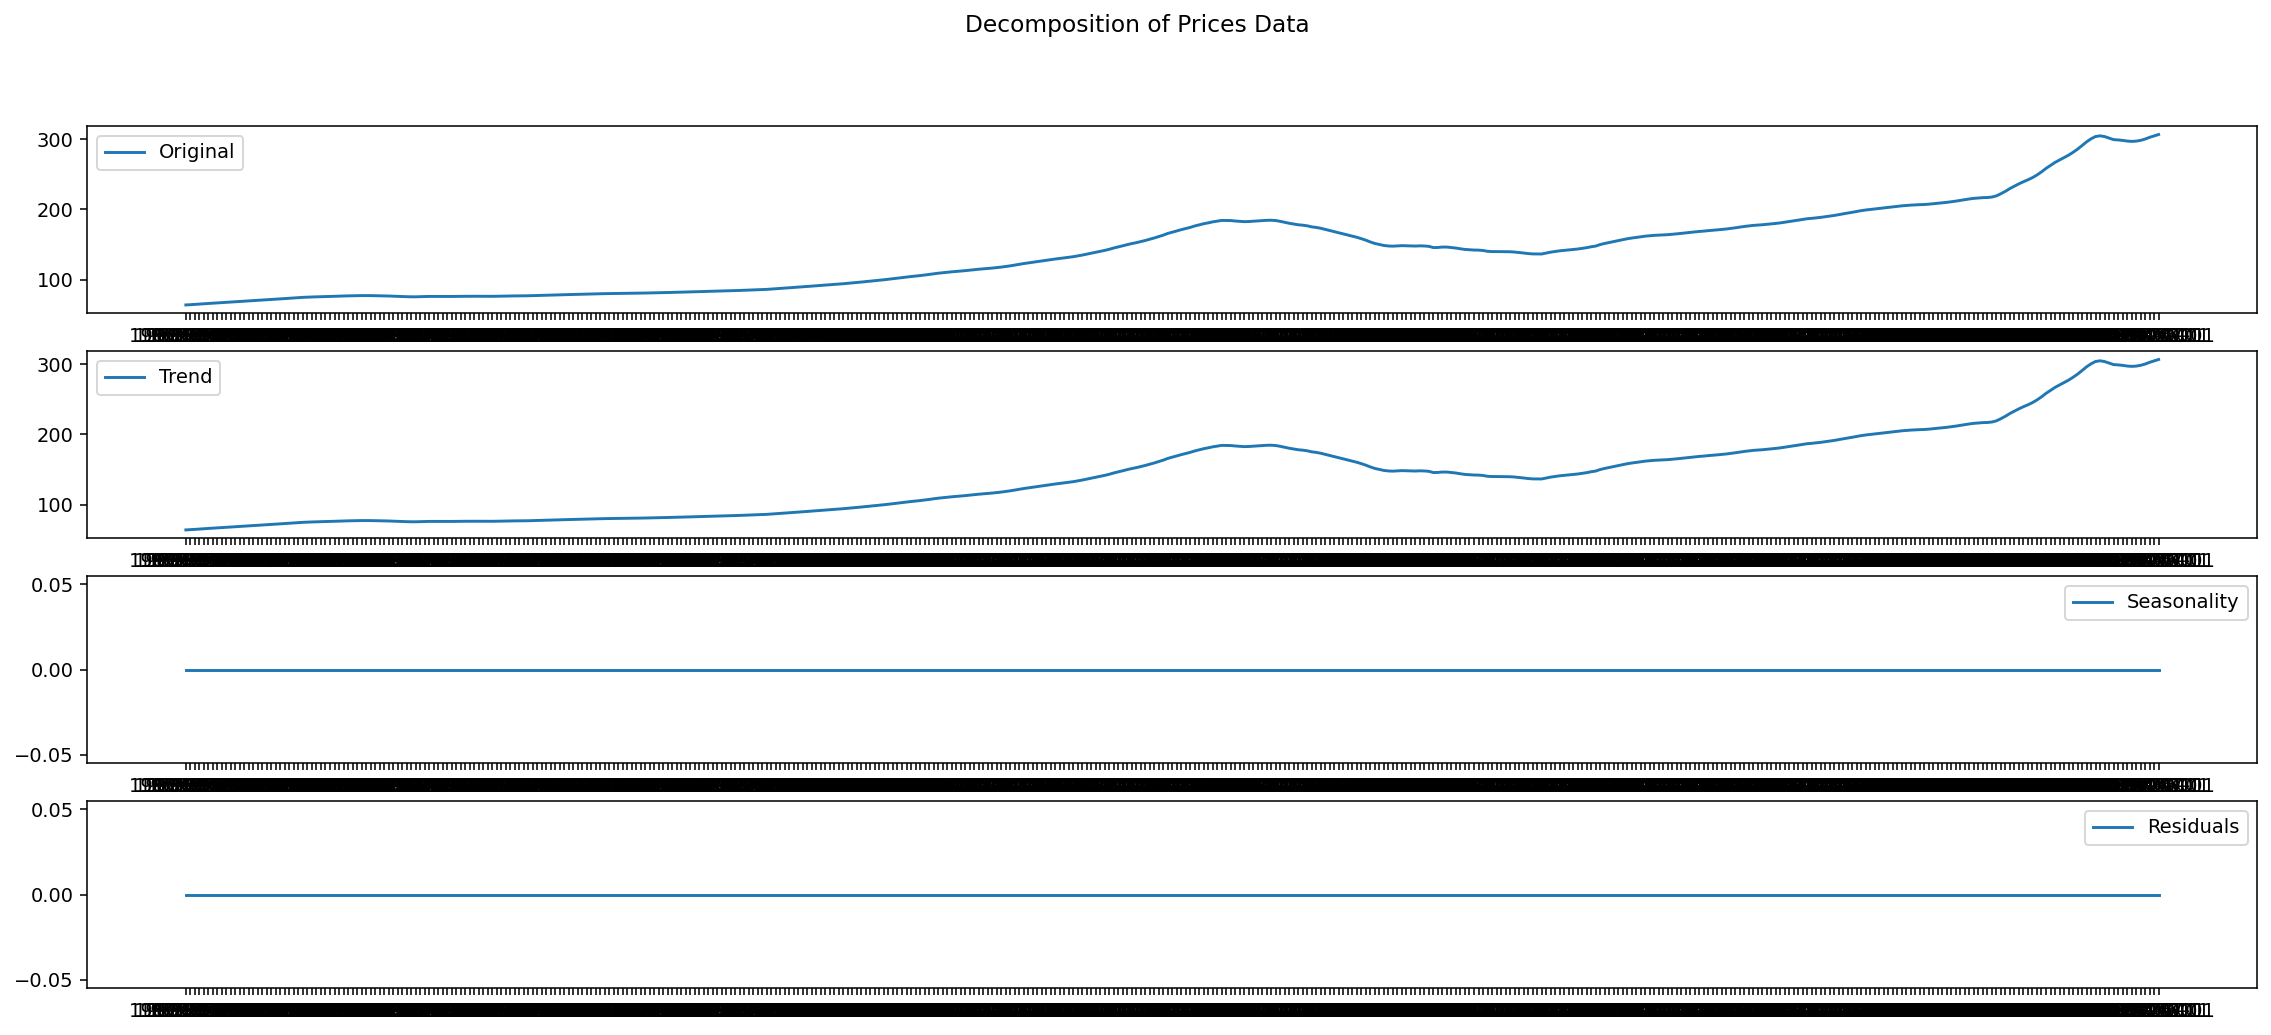

In [145]:
decomposition = sm.tsa.seasonal_decompose(df.CSUSHPISA,model='additive', extrapolate_trend='freq', period=1)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

fig = plt.figure(figsize=(20,8))

plt.subplot(411)
plt.plot(df.CSUSHPISA, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')

fig.suptitle('Decomposition of Prices Data')
plt.show()

In [147]:
print("Dickey–Fuller test: p=%f" % sm.tsa.stattools.adfuller(df.CSUSHPISA)[1])

Dickey–Fuller test: p=0.994589


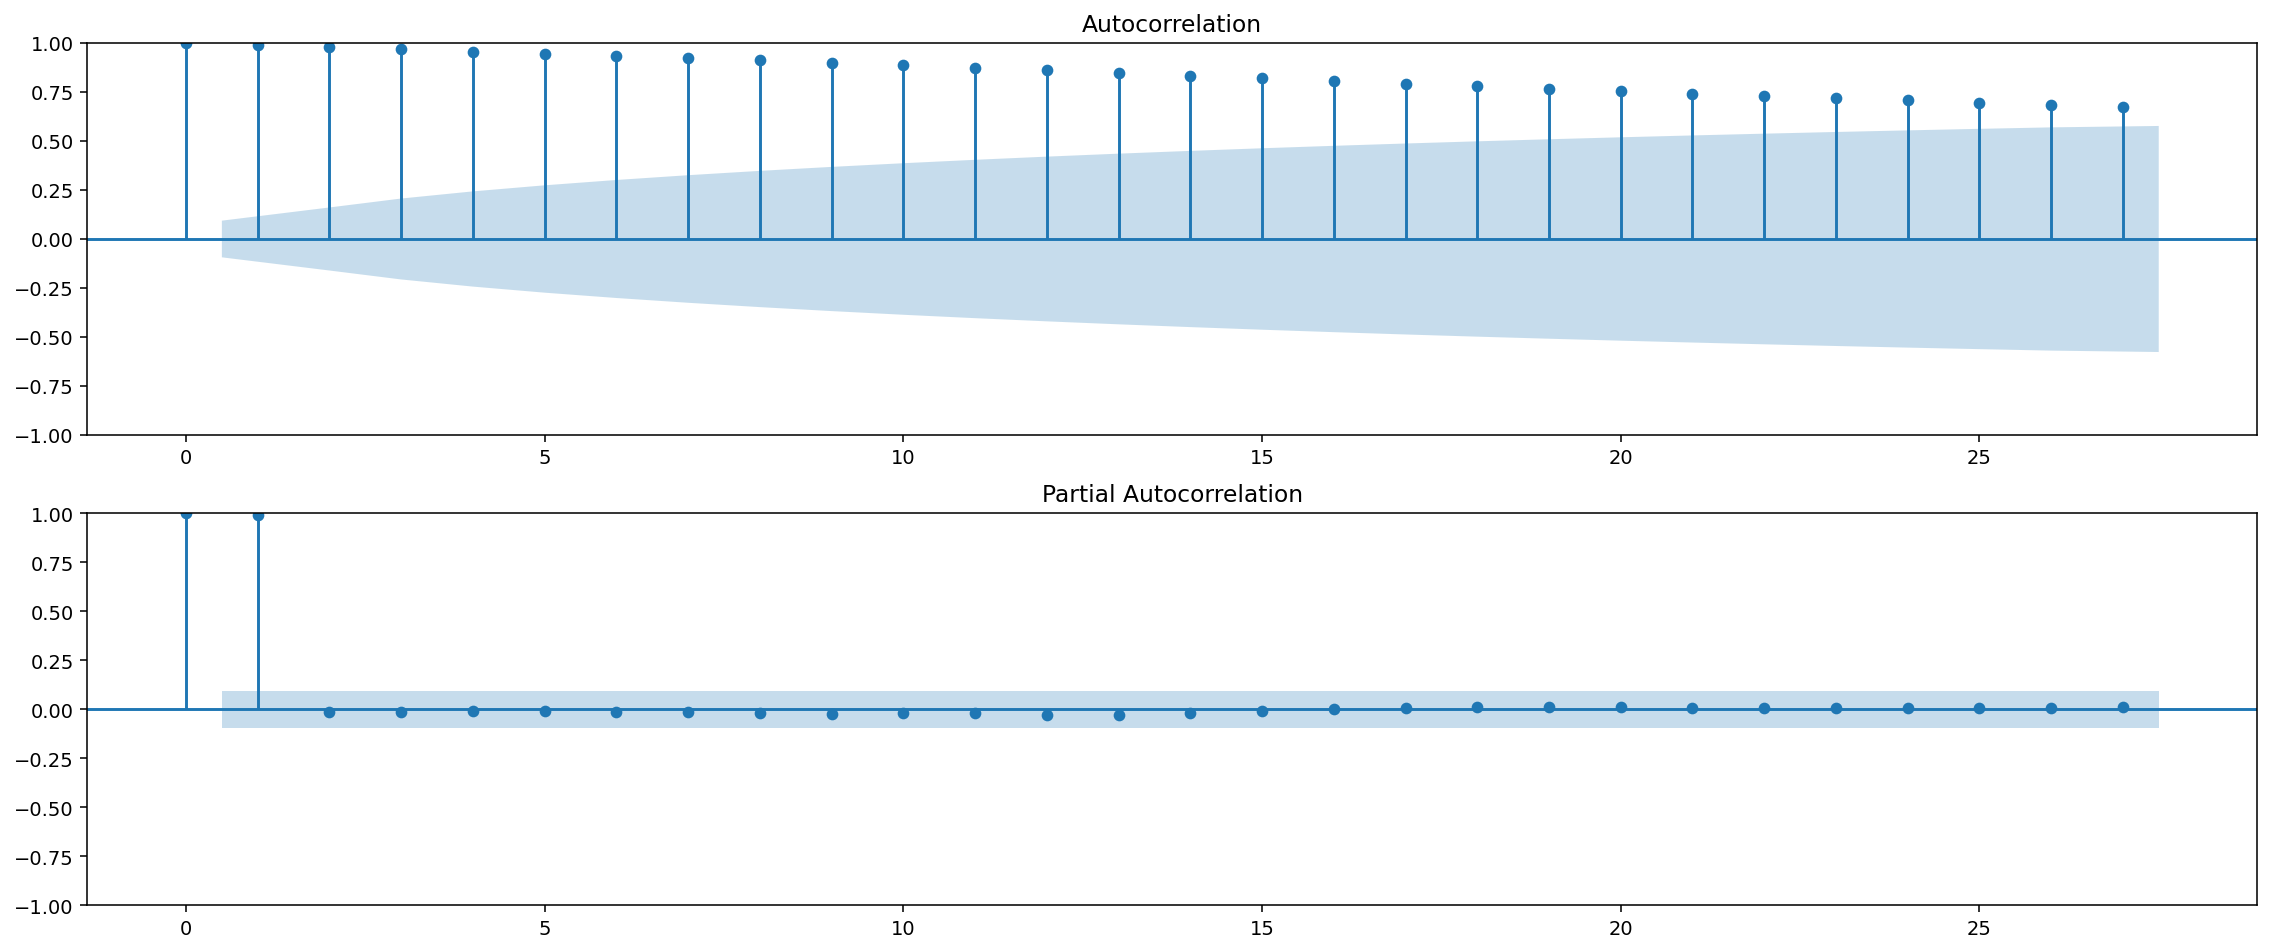

In [148]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib import pyplot
pyplot.figure(figsize=(20,8))
pyplot.subplot(211)
plot_acf(df.CSUSHPISA, ax=pyplot.gca())
pyplot.subplot(212)
plot_pacf(df.CSUSHPISA, ax=pyplot.gca())
pyplot.show()

In [149]:
# Initial approximation of parameters
Qs = range(0, 2)
qs = range(0, 3)
Ps = range(0, 3)
ps = range(0, 3)
D=1
d=1
parameters = product(ps, qs, Ps, Qs)
parameters_list = list(parameters)
len(parameters_list)

# Model Selection
results = []
best_aic = float("inf")
warnings.filterwarnings('ignore')
for param in parameters_list:
    try:
        model=sm.tsa.statespace.SARIMAX(df.CSUSHPISA, order=(param[0], d, param[1]),
                                        seasonal_order=(param[2], D, param[3], 12),enforce_stationarity=False,
                                            enforce_invertibility=False).fit(disp=-1)
    except ValueError:
        print('wrong parameters:', param)
        continue
    aic = model.aic
    if aic < best_aic:
        best_model = model
        best_aic = aic
        best_param = param
    results.append([param, model.aic])

In [150]:
# Best Models
result_table = pd.DataFrame(results)
result_table.columns = ['parameters', 'aic']
print(result_table.sort_values(by = 'aic', ascending=True).head())
print(best_model.summary())

      parameters         aic
31  (1, 2, 0, 1)  251.110186
49  (2, 2, 0, 1)  252.451914
33  (1, 2, 1, 1)  257.016963
35  (1, 2, 2, 1)  257.708896
51  (2, 2, 1, 1)  258.111377
                                      SARIMAX Results                                       
Dep. Variable:                            CSUSHPISA   No. Observations:                  439
Model:             SARIMAX(1, 1, 2)x(0, 1, [1], 12)   Log Likelihood                -120.555
Date:                              Tue, 26 Sep 2023   AIC                            251.110
Time:                                      19:47:13   BIC                            271.203
Sample:                                  01-01-1987   HQIC                           259.059
                                       - 07-01-2023                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
---

Dickey–Fuller test:: p=0.000000


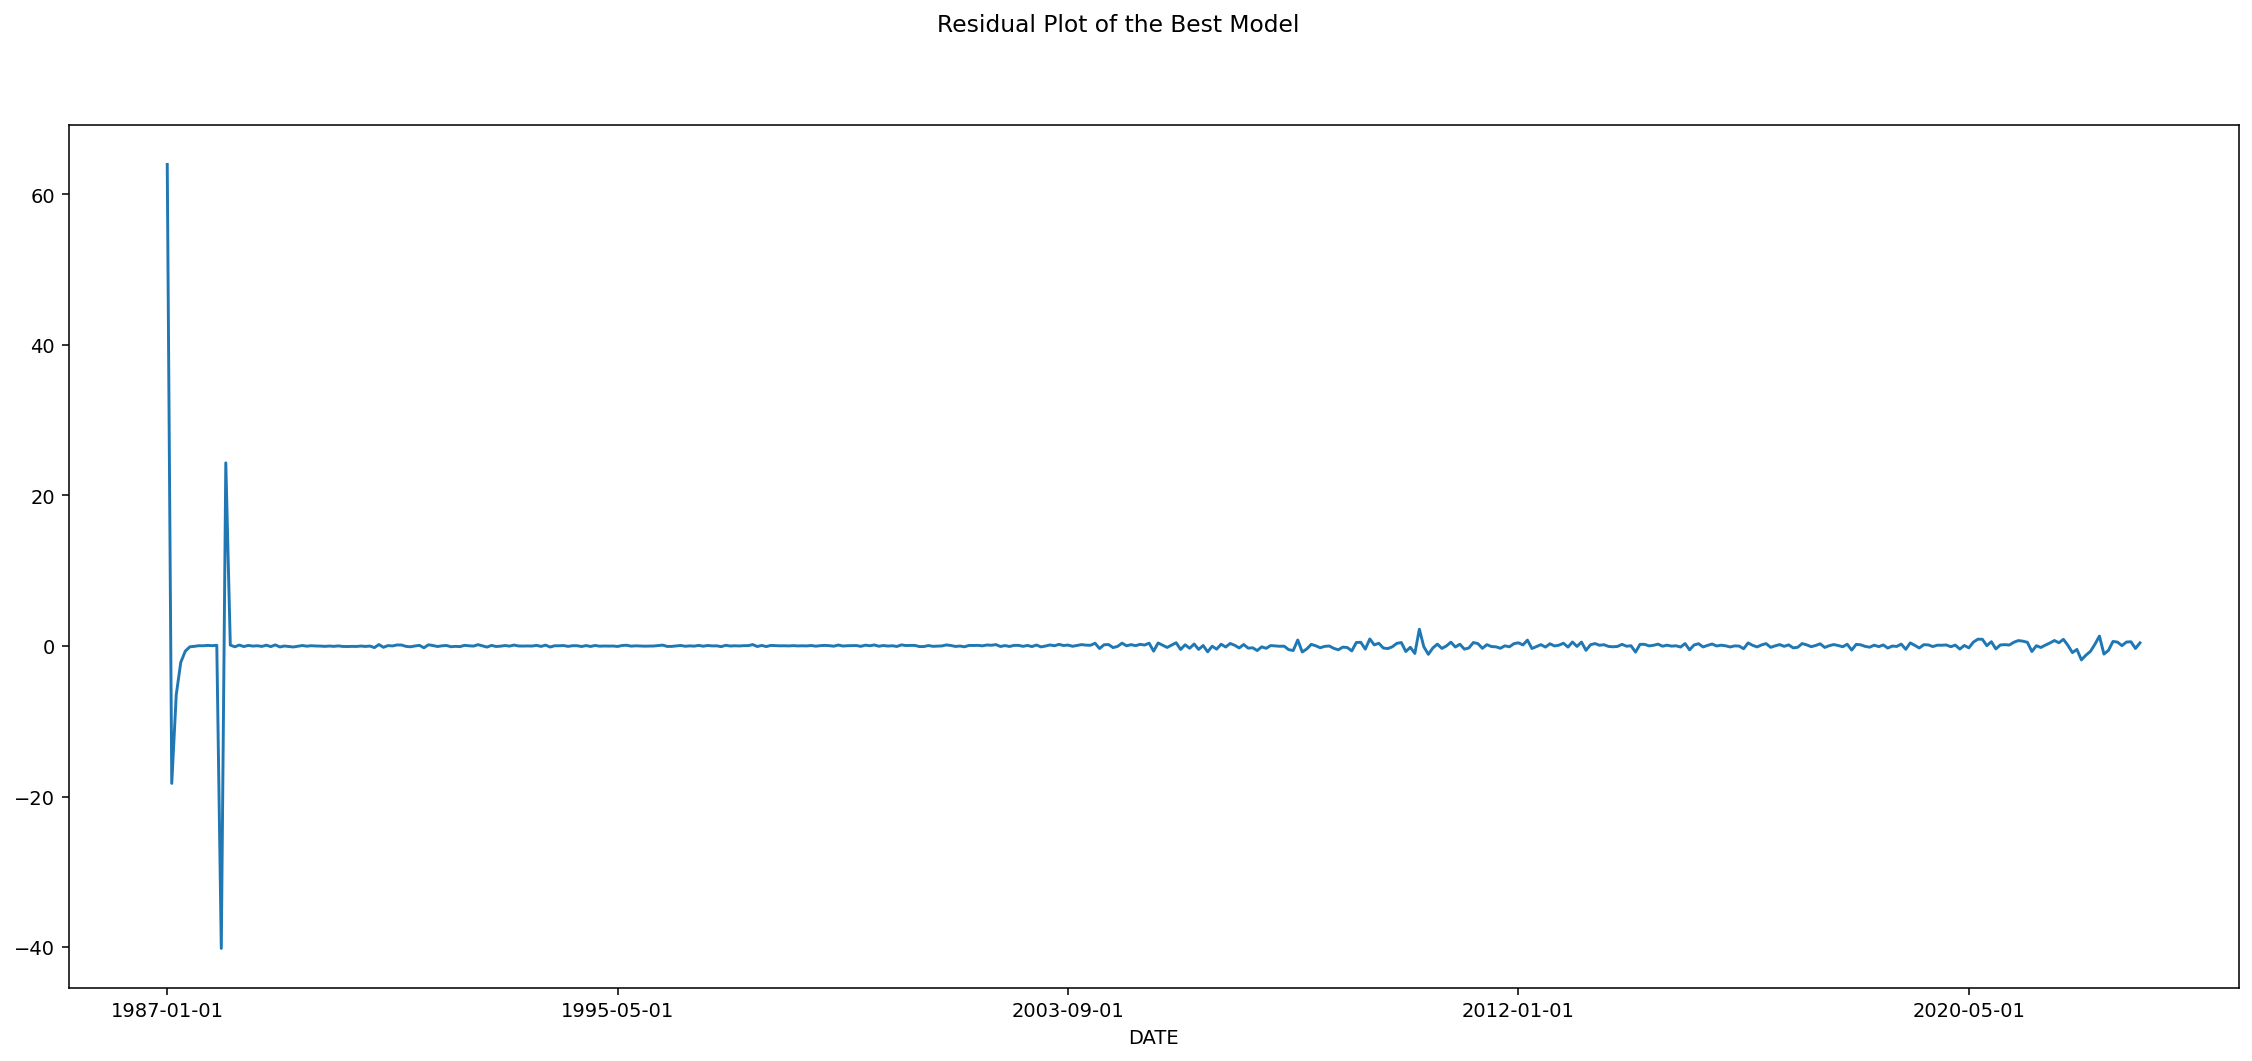

In [151]:
fig = plt.figure(figsize=(20,8))
best_model.resid.plot()
fig.suptitle('Residual Plot of the Best Model')
print("Dickey–Fuller test:: p=%f" % sm.tsa.stattools.adfuller(best_model.resid)[1])

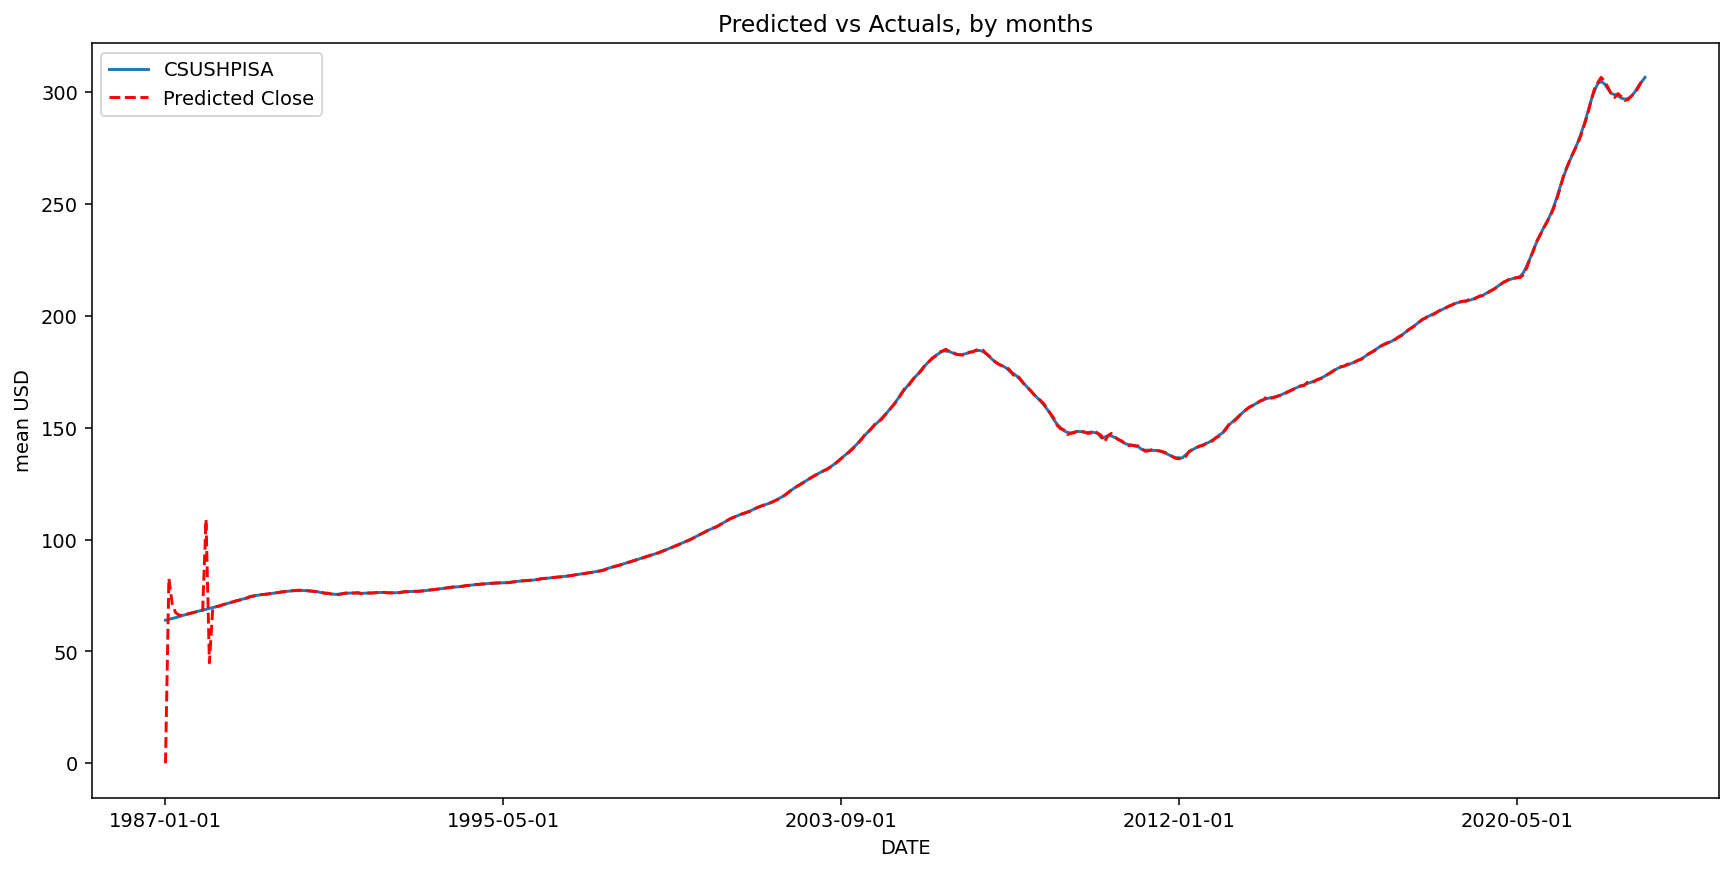

In [153]:
df_month2 = df[['CSUSHPISA']]
future = pd.DataFrame()
df_month2 = pd.concat([df_month2, future])
df_month2['forecast'] = best_model.predict()
plt.figure(figsize=(15,7))
df_month2.CSUSHPISA.plot()
df_month2.forecast.plot(color='r', ls='--', label='Predicted Close')
plt.legend()
plt.title('Predicted vs Actuals, by months')
plt.ylabel('mean USD')
plt.show()

Prediction for Price

In [154]:
df_month2.tail(20)

,CSUSHPISA,forecast
DATE,,
2021-12-01,281.348,280.627566
2022-01-01,285.829,285.406545
2022-02-01,290.924,290.043771
2022-03-01,296.228,296.152096
2022-04-01,300.569,301.451126
2022-05-01,303.863,304.324279
2022-06-01,304.832,306.687486
2022-07-01,303.800,305.024167
2022-08-01,301.637,302.361497


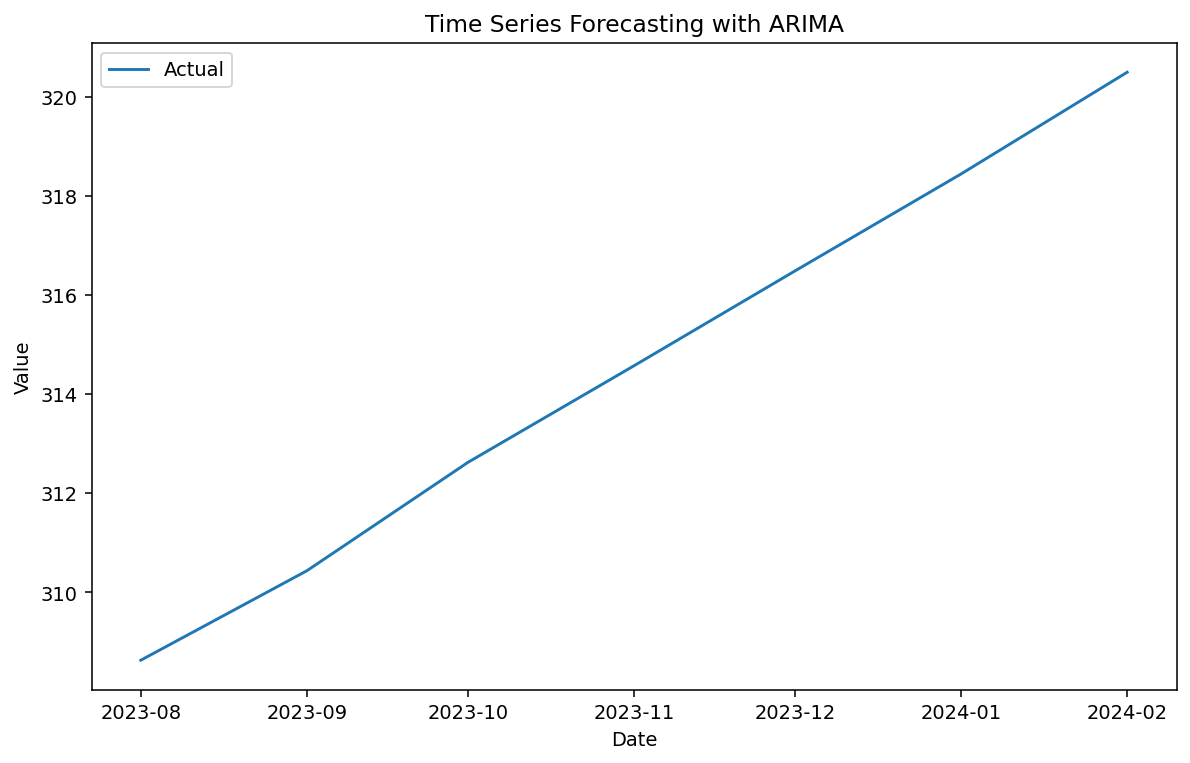

In [168]:
from datetime import timedelta

# Forecast next 7 days
forecast_steps = 7
forecast = best_model.forecast(steps=forecast_steps)

# Generate date index for the forecast
last_date = datetime.strptime(df_month2.index[-1],'%Y-%m-%d')
forecast_dates = pd.date_range(start=last_date + timedelta(days=7), periods=forecast_steps, freq='D')

# Create a forecast series with dates as index
forecast_series = pd.Series(forecast, index=forecast_dates)

# Plot the original time series and the forecast
plt.figure(figsize=(10, 6))
plt.plot(forecast, label='Actual')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Time Series Forecasting with ARIMA')
plt.legend()
plt.show()

Home Price Index

THE END